In [ ]:
!pip install pandas tiktoken graphrag
!pip install leidenalg pyvis
!pip install neo4j yfiles_jupyter_graphs
!pip install langchain langchain-community langchain-openai langchain-experimental

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.2/389.2 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 187.2/187.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.7/297.7 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.6/405.6 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/

In [ ]:
import os

import pandas as pd
import tiktoken

from graphrag.query.indexer_adapters import read_indexer_entities, read_indexer_reports
from graphrag.query.llm.oai.chat_openai import ChatOpenAI
from graphrag.query.llm.oai.typing import OpenaiApiType
from graphrag.query.structured_search.global_search.community_context import (
    GlobalCommunityContext,
)
from graphrag.query.structured_search.global_search.search import GlobalSearch

In [ ]:
api_key = ""
api_base = ""
api_version = ""
llm_model = "gpt-4o"
embedding_model = ""

llm = ChatOpenAI(
    api_key=api_key,
    model=llm_model,
    api_type=OpenaiApiType.AzureOpenAI,
    api_base = api_base,
    api_version=api_version,
    max_retries=20,
)

token_encoder = tiktoken.get_encoding("cl100k_base")

In [ ]:
# 인덱싱 파이프라인으로 생성된 parquet 파일
INPUT_DIR = "./inputs/operation dulce"
COMMUNITY_REPORT_TABLE = "create_final_community_reports"
ENTITY_TABLE = "create_final_nodes"
ENTITY_EMBEDDING_TABLE = "create_final_entities"

COMMUNITY_LEVEL = 2

In [ ]:
entity_df = pd.read_parquet(f"{INPUT_DIR}/{ENTITY_TABLE}.parquet")
report_df = pd.read_parquet(f"{INPUT_DIR}/{COMMUNITY_REPORT_TABLE}.parquet")
entity_embedding_df = pd.read_parquet(f"{INPUT_DIR}/{ENTITY_EMBEDDING_TABLE}.parquet")

reports = read_indexer_reports(report_df, entity_df, COMMUNITY_LEVEL)
entities = read_indexer_entities(entity_df, entity_embedding_df, COMMUNITY_LEVEL)
print(f"Total report count: {len(report_df)}")
print(
    f"Report count after filtering by community level {COMMUNITY_LEVEL}: {len(reports)}"
)
report_df.head()

/usr/local/lib/python3.10/dist-packages/graphrag/query/indexer_adapters.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entity_df["community"] = entity_df["community"].fillna(-1)
/usr/local/lib/python3.10/dist-packages/graphrag/query/indexer_adapters.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entity_df["community"] = entity_df["community"].astype(int)


Total report count: 223
Report count after filtering by community level 2: 168


community                                       full_content  level  rank  \
0       230  # Orthopoxviruses and Detection Technologies\n...      3   8.5   
1       231  # Monkeypox Virus Research Community\n\nThe co...      3   8.5   
2       232  # Enterobacter Cloacae and Enterobacter Aeroge...      3   7.5   
3       233  # Salmonella enterica and Associated Pathogens...      3   8.5   
4       138  # US and Ghana Monkeypox Outbreak\n\nThe commu...      2   8.5   

                                               title  \
0         Orthopoxviruses and Detection Technologies   
1                 Monkeypox Virus Research Community   
2  Enterobacter Cloacae and Enterobacter Aerogene...   
3       Salmonella enterica and Associated Pathogens   
4                    US and Ghana Monkeypox Outbreak   

                                    rank_explanation  \
0  The impact severity rating is high due to the ...   
1  The impact severity rating is high due to the ...   
2  The impact severity rating is high due to the ...   
3  The impact severity rating is high due to the ...   
4  The impact severity rating is high due to the ...   

                                             summary  \
0  The community revolves around the Orthopoxviru...   
1  The community revolves around the research and...   
2  The community revolves around two key bacteria...   
3  The community revolves around Salmonella enter...   
4  The community revolves around the 2003 monkeyp...   

                                            findings  \
0  [{'explanation': 'Orthopoxviruses are a genus ...   
1  [{'explanation': 'Kulesh is a prominent resear...   
2  [{'explanation': 'Enterobacter cloacae is a no...   
3  [{'explanation': 'Salmonella enterica is the c...   
4  [{'explanation': 'The United States experience...   

                                   full_content_json  \
0  {\n    "title": "Orthopoxviruses and Detection...   
1  {\n    "title": "Monkeypox Virus Research Comm...   
2  {\n    "title": "Enterobacter Cloacae and Ente...   
3  {\n    "title": "Salmonella enterica and Assoc...   
4  {\n    "title": "US and Ghana Monkeypox Outbre...   

                                     id  
0  f724ab09-9c56-4d5e-9bc9-4b9ebd5b04c2  
1  d6def3bf-1eac-49a6-a3bf-a0b8315442e1  
2  1a5adf3c-1f24-43ed-8e4e-4cff1e984670  
3  dc48bfed-0862-408a-83cf-8e431f99841c  
4  33fcd380-3c6e-4be7-92e3-1f93f8acac47

In [ ]:
context_builder = GlobalCommunityContext(
    community_reports=reports,
    entities=entities,
    token_encoder=token_encoder,
)

In [ ]:
context_builder_params = {
    "use_community_summary": False,  # False: full community reports. True: community short summaries.
    "shuffle_data": True,
    "include_community_rank": True,
    "min_community_rank": 0,
    "community_rank_name": "rank",
    "include_community_weight": True,
    "community_weight_name": "occurrence weight",
    "normalize_community_weight": True,
    "max_tokens": 12_000,  # token limit
    "context_name": "Reports",
}

map_llm_params = {
    "max_tokens": 1000,
    "temperature": 0.0,
    "response_format": {"type": "json_object"},
}

reduce_llm_params = {
    "max_tokens": 2000,  #  token limit
    "temperature": 0.0,
}

In [ ]:
search_engine = GlobalSearch(
    llm=llm,
    context_builder=context_builder,
    token_encoder=token_encoder,
    max_data_tokens=12_000,  # token limit
    map_llm_params=map_llm_params,
    reduce_llm_params=reduce_llm_params,
    allow_general_knowledge=False,  # True: hallucinations 상승
    json_mode=True,
    context_builder_params=context_builder_params,
    concurrent_coroutines=32,
    response_type="multiple paragraphs",
)

In [ ]:
result = await search_engine.asearch(
    "Tell me some candidate genes that could detect Monkeypox virus."
)

print(result.response)

### Candidate Genes for Detecting Monkeypox Virus

The detection of the Monkeypox virus (MPXV) involves targeting specific genes that are highly conserved and significant within the Orthopoxvirus genus. Several candidate genes have been identified and utilized in various diagnostic assays, particularly in real-time PCR and TaqMan PCR assays. Here are some of the key genes:

#### crmB Gene
The crmB gene is a highly conserved genomic region in the Orthopoxvirus genus, making it an ideal target for designing specific probes in the TaqMan PCR assay. This gene's significance is highlighted by its use in the Real-Time PCR Assay to detect the variola virus and potentially the Monkeypox virus [Data: Reports (180, 205)].

#### Hemagglutinin (HA) Gene
The hemagglutinin gene is another candidate for detecting the variola virus and other orthopoxviruses, including the Monkeypox virus. Specific TaqMan probes designed on this gene have been proposed for detection purposes [Data: Reports (213, 201)].

In [ ]:
# inspect the data used to build the context for the LLM responses
result.context_data["reports"]

id                                              title  \
0     36                       Sudan and Monkeypox Outbreak   
1    180         Real-Time PCR Assay and Smallpox Detection   
2     59  Journal of Clinical Microbiology and Related S...   
3     80                Orthopoxvirus Detection Researchers   
4    133  Varicella-Zoster Virus and Outbreaks in the De...   
..   ...                                                ...   
163   42                        Shigella Research Community   
164  173                      S. enteritidis 13076 and ATCC   
165  175                             ENIVD and Cowpox Virus   
166  143  Stephenson, J. and J.A.M.A. on Monkeypox Outbreak   
167  149  Monkeypox Research Contributors: C.L. Hutson a...   

     occurrence weight                                            content  \
0             0.470588  # Sudan and Monkeypox Outbreak\n\nThe communit...   
1             0.294118  # Real-Time PCR Assay and Smallpox Detection\n...   
2             0.294118  # Journal of Clinical Microbiology and Related...   
3             0.235294  # Orthopoxvirus Detection Researchers\n\nThe c...   
4             0.235294  # Varicella-Zoster Virus and Outbreaks in the ...   
..                 ...                                                ...   
163           0.176471  # Shigella Research Community\n\nThe community...   
164           0.058824  # S. enteritidis 13076 and ATCC\n\nThe communi...   
165           0.058824  # ENIVD and Cowpox Virus\n\nThe community revo...   
166           0.058824  # Stephenson, J. and J.A.M.A. on Monkeypox Out...   
167           0.058824  # Monkeypox Research Contributors: C.L. Hutson...   

     rank  
0     7.5  
1     8.5  
2     7.5  
3     8.5  
4     7.5  
..    ...  
163   7.5  
164   7.5  
165   7.5  
166   7.5  
167   7.5  

[168 rows x 5 columns]

In [ ]:
print(f"LLM calls: {result.llm_calls}. LLM tokens: {result.prompt_tokens}")

LLM calls: 11. LLM tokens: 126049


# GraphRAG visualization

In [ ]:
import pandas as pd
import networkx as nx
import leidenalg as la
import igraph as ig
import matplotlib.pyplot as plt

In [ ]:
COMMUNITY_LEVEL = 2

entity_df = pd.read_parquet(f"{INPUT_DIR}/{ENTITY_TABLE}.parquet")
report_df = pd.read_parquet(f"{INPUT_DIR}/{COMMUNITY_REPORT_TABLE}.parquet")
entity_embedding_df = pd.read_parquet(f"{INPUT_DIR}/{ENTITY_EMBEDDING_TABLE}.parquet")

reports = read_indexer_reports(report_df, entity_df, COMMUNITY_LEVEL)
entities = read_indexer_entities(entity_df, entity_embedding_df, COMMUNITY_LEVEL)
print(f"Total report count: {len(report_df)}")
print(
    f"Report count after filtering by community level {COMMUNITY_LEVEL}: {len(reports)}"
)

report_df.head()
report_df.to_csv("Seegene_GraphRAG_community_reports.csv")

/usr/local/lib/python3.10/dist-packages/graphrag/query/indexer_adapters.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entity_df["community"] = entity_df["community"].fillna(-1)
/usr/local/lib/python3.10/dist-packages/graphrag/query/indexer_adapters.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entity_df["community"] = entity_df["community"].astype(int)


Total report count: 223
Report count after filtering by community level 2: 168


In [ ]:
INPUT_DIR = "/content/inputs/operation dulce"
FINAL_RELATIONSHIP = "create_final_relationships"

entity_embedding_df = pd.read_parquet(f"{INPUT_DIR}/{FINAL_RELATIONSHIP}.parquet")
entity_embedding_df.to_csv(f"{INPUT_DIR}/Seegene_GraphRAG_final-relationship.csv")

Columns in the dataframe: Index(['Unnamed: 0', 'source', 'target', 'weight', 'description',
       'text_unit_ids', 'id', 'human_readable_id', 'source_degree',
       'target_degree', 'rank'],
      dtype='object')

First few rows of the dataframe:
   Unnamed: 0            source  \
0           0          ELSEVIER   
1           1  MOHAMED AITICHOU   
2           2  MOHAMED AITICHOU   
3           3     SHARRON SALEH   
4           4      PARK KYUSUNG   

                                              target  weight  \
0                       MONKEYPOX INFORMATION CENTER     2.0   
1  UNITED STATES ARMY MEDICAL RESEARCH INSTITUTE ...     1.0   
2                         US ARMY MEDICAL DEPARTMENT     1.0   
3  UNITED STATES ARMY MEDICAL RESEARCH INSTITUTE ...     1.0   
4                                  INVITROGEN, CORP.     1.0   

                                         description  \
0  Elsevier created and hosts the Monkeypox Infor...   
1  Mohamed Aitichou is a researcher at the 

<ipython-input-19-dbba0ff21ac1>:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


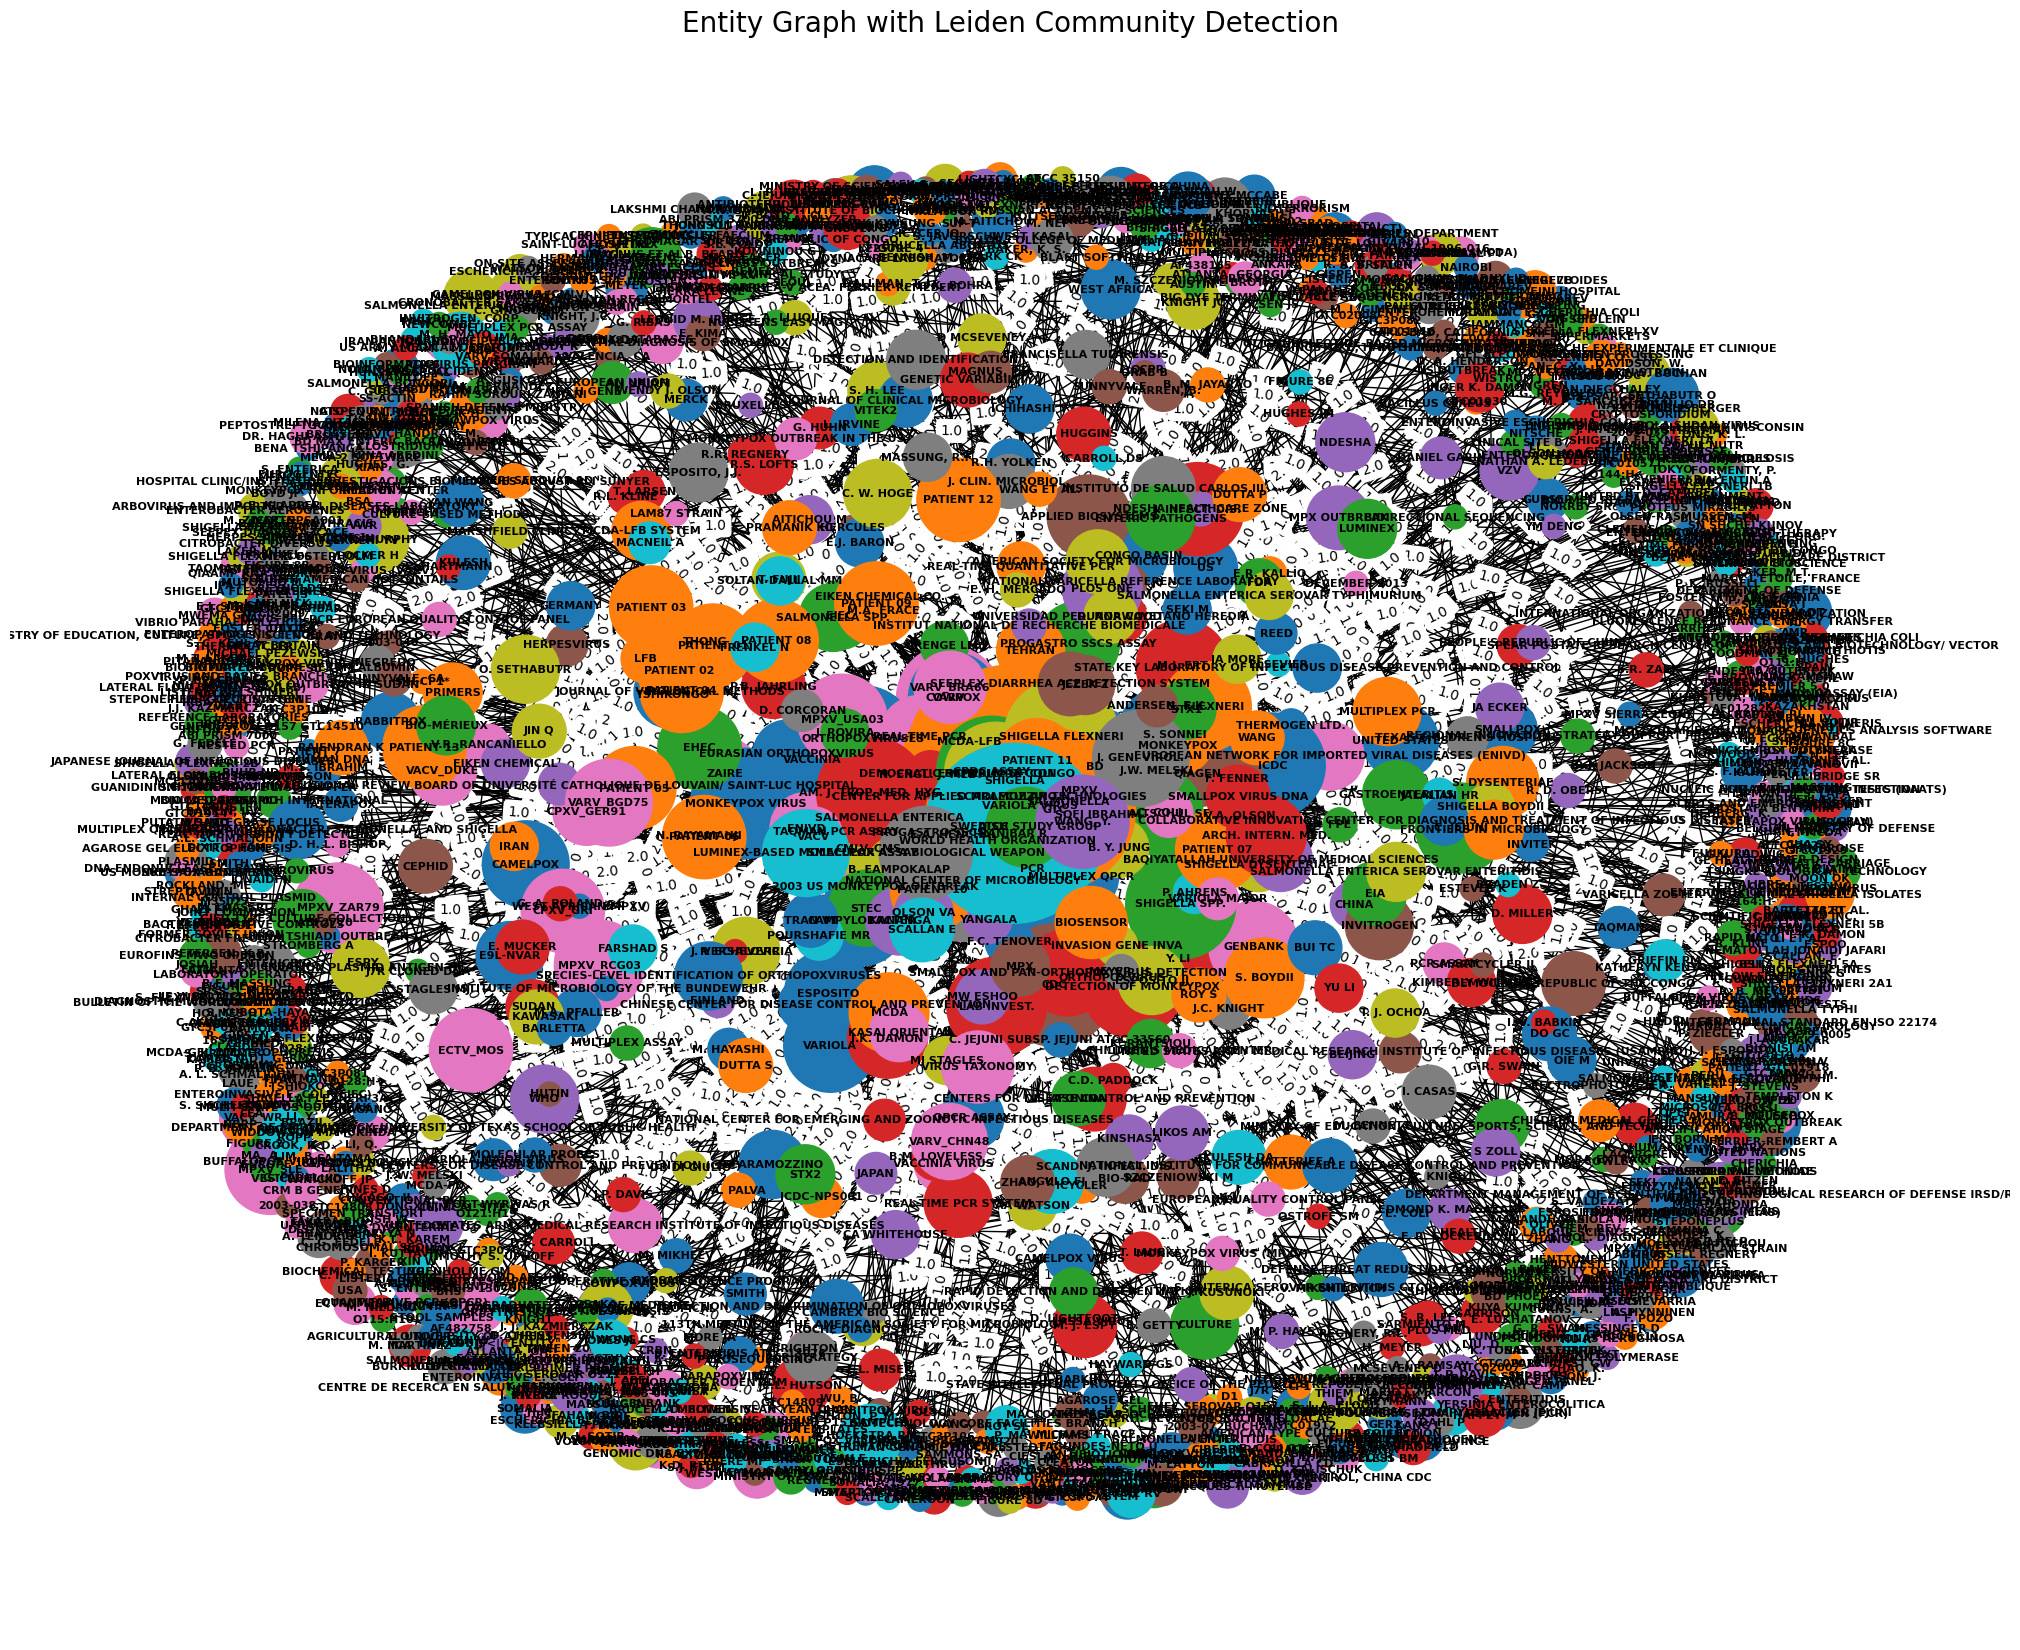


Community Information:
Node: ELSEVIER, Community: 99
Node: MONKEYPOX INFORMATION CENTER, Community: 99
Node: MOHAMED AITICHOU, Community: 46
Node: UNITED STATES ARMY MEDICAL RESEARCH INSTITUTE OF INFECTIOUS DISEASES, Community: 46
Node: US ARMY MEDICAL DEPARTMENT, Community: 46
Node: SHARRON SALEH, Community: 46
Node: PARK KYUSUNG, Community: 100
Node: INVITROGEN, CORP., Community: 100
Node: JOHN HUGGINS, Community: 46
Node: MONICA O'GUINN, Community: 46
Node: PETER JAHRLING, Community: 101
Node: NIH, NIAID, Community: 101
Node: SOFI IBRAHIM, Community: 0
Node: VARV, Community: 6
Node: TAQMAN PROBES, Community: 6
Node: KULESH, Community: 0
Node: NITSCHE, Community: 0
Node: FIONA WESTBURY, Community: 0
Node: MATTHIAS NIEDRIG, Community: 0
Node: R. ESCUDERO, Community: 0
Node: S. VALDEZATE, Community: 0
Node: M. I. GIMENEZ, Community: 0
Node: F. POZO, Community: 0
Node: MONKEYPOX, Community: 0
Node: GHANA, Community: 0
Node: COWPOX, Community: 0
Node: PCR, Community: 0
Node: TET, Commun

In [ ]:
# 데이터 로드
data = pd.read_csv(f'{INPUT_DIR}/Seegene_GraphRAG_final-relationship.csv')
# 데이터프레임 구조 확인
print("Columns in the dataframe:", data.columns)
print("\nFirst few rows of the dataframe:")
print(data.head())

# NetworkX 그래프 생성
G = nx.from_pandas_edgelist(data, 'source', 'target', ['weight'])

# NetworkX 그래프를 igraph로 변환
G_ig = ig.Graph.from_networkx(G)

# 노드 이름을 igraph 객체에 추가
G_ig.vs['name'] = list(G.nodes())

# Leiden 알고리즘 적용
partition = la.find_partition(G_ig, la.ModularityVertexPartition)

# 커뮤니티 정보 추출
community_dict = {v['name']: membership for v, membership in zip(G_ig.vs, partition.membership)}

# 노드 색상 설정
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
node_colors = [colors[community_dict[node] % len(colors)] for node in G.nodes()]

# 노드 크기 설정 (degree에 기반)
node_sizes = [300 * G.degree(node) for node in G.nodes()]

# 그래프 그리기
pos = nx.spring_layout(G, k=0.5, iterations=50)
plt.figure(figsize=(20, 16))
nx.draw(G, pos, node_color=node_colors, with_labels=True, node_size=node_sizes, font_size=8, font_weight='bold')

# 엣지 레이블 추가
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Entity Graph with Leiden Community Detection", fontsize=20)
plt.axis('off')
plt.tight_layout()
plt.show()

# 커뮤니티 정보 출력
print("\nCommunity Information:")
for node, community in community_dict.items():
    print(f"Node: {node}, Community: {community}")

In [ ]:
print(data)

      Unnamed: 0            source  \
0              0          ELSEVIER   
1              1  MOHAMED AITICHOU   
2              2  MOHAMED AITICHOU   
3              3     SHARRON SALEH   
4              4      PARK KYUSUNG   
...          ...               ...   
2359        2359          ZHAO, Y.   
2360        2360          ZHAO, Y.   
2361        2361          ZHAO, Y.   
2362        2362          ZHAO, Y.   
2363        2363          ZHAO, Y.   

                                                 target  weight  \
0                          MONKEYPOX INFORMATION CENTER     2.0   
1     UNITED STATES ARMY MEDICAL RESEARCH INSTITUTE ...     1.0   
2                            US ARMY MEDICAL DEPARTMENT     1.0   
3     UNITED STATES ARMY MEDICAL RESEARCH INSTITUTE ...     1.0   
4                                     INVITROGEN, CORP.     1.0   
...                                                 ...     ...   
2359                                           CHEN, F.     1.0   
2360   

# make taxon, gene, link keyword list

In [ ]:
file_names = os.listdir('/content/output_json')
print(file_names)

['v6_2_gpt-4o-ptu_SummaryData_Case1_PMID_26171358_di_conten.json', 'v6_2_gpt-4o-ptu_SummaryData_Case1_PMID_23761159_di_conten.json', 'v6_2_gpt-4o-ptu_SummaryData_Case1_PMID_24048539_di_conten.json', 'v6_2_gpt-4o-ptu_SummaryData_Case1_PMID_16731033_di_conten.json', 'v6_2_gpt-4o-ptu_SummaryData_Case1_PMID_24364031_di_conten.json', 'v6_2_gpt-4o-ptu_SummaryData_Case1_PMID_24841633_di_conten.json', 'v6_2_gpt-4o-ptu_SummaryData_Case1_PMID_27917160_di_conten.json', 'v6_2_gpt-4o-ptu_SummaryData_Case1_PMID_18725245_di_conten.json', 'v6_2_gpt-4o-ptu_SummaryData_Case1_PMID_17065259_di_conten.json', 'v6_2_gpt-4o-ptu_SummaryData_Case1_PMID_20643162_di_conten.json']


In [ ]:
json_files = []
for file_name in file_names:
  file_name = '/content/output_json/' + file_name
  json_files.append(file_name)
print(json_files)

['/content/output_json/v6_2_gpt-4o-ptu_SummaryData_Case1_PMID_26171358_di_conten.json', '/content/output_json/v6_2_gpt-4o-ptu_SummaryData_Case1_PMID_23761159_di_conten.json', '/content/output_json/v6_2_gpt-4o-ptu_SummaryData_Case1_PMID_24048539_di_conten.json', '/content/output_json/v6_2_gpt-4o-ptu_SummaryData_Case1_PMID_16731033_di_conten.json', '/content/output_json/v6_2_gpt-4o-ptu_SummaryData_Case1_PMID_24364031_di_conten.json', '/content/output_json/v6_2_gpt-4o-ptu_SummaryData_Case1_PMID_24841633_di_conten.json', '/content/output_json/v6_2_gpt-4o-ptu_SummaryData_Case1_PMID_27917160_di_conten.json', '/content/output_json/v6_2_gpt-4o-ptu_SummaryData_Case1_PMID_18725245_di_conten.json', '/content/output_json/v6_2_gpt-4o-ptu_SummaryData_Case1_PMID_17065259_di_conten.json', '/content/output_json/v6_2_gpt-4o-ptu_SummaryData_Case1_PMID_20643162_di_conten.json']


In [ ]:
import json

TAXON = []
GENE = []
LINK_KEYWORD = []

for file_name in json_files:
  with open(file_name, 'r') as file:
        data = json.load(file)
        reference_info = data.get("ReferenceInfo", {})

        TAXON.extend(reference_info.get("Taxon", []))
        GENE.extend(reference_info.get("Gene", []))
        LINK_KEYWORD.extend(reference_info.get("Link keyword", []))

print("TAXON:", TAXON)
print("GENE:", GENE)
print("LINK_KEYWORD:", LINK_KEYWORD)

TAXON: ['Shigella', 'NaN', 'Campylobacter spp.', 'Salmonella spp.', 'Shigella spp.', 'Escherichia coli', 'Orthopoxvirus', 'Salmonella enterica', 'Shigella spp.', 'Enteroinvasive Escherichia coli', 'Enterohemorrhagic E. coli', 'NaN', 'Bacteria', 'Orthopoxvirus', 'Orthopoxvirus', 'Orthopoxvirus']
GENE: ['Putative Integrase', 'Putative Restriction Endonuclease', 'Putative Bacteriophage Protein', 'Conserved Hypothetical Protein', 'invA', 'ipaH', '16S rRNA', 'stx1', 'stx2', 'ttRSBCA', 'ipaH', '16S rRNA', 'glyA', 'cadF', 'E9L', 'B6R', 'stx1', 'stx2', 'ipaH', 'invA', '14-kilodalton protein gene', '14 kDa gene', 'ipaH', 'hemagglutinin gene', 'crmB', 'G2R', 'G2R_WA', 'C3L', 'B6R', 'TNF receptor gene']
LINK_KEYWORD: ['Multiplex-PCR', 'Shigella spp.', 'Shigellosis', 'standard PCR', 'non Shigella species', 'primers', 'optimized', 'simultaneous detection', 'clinical strains', 'Putative Integrase', 'Putative Restriction Endonuclease', 'Putative Bacteriophage Protein', 'Conserved Hypothetical Protein

In [ ]:
# NaN 개수
print("TAXON NaN 개수:", TAXON.count('NaN'))
print("GENE NaN 개수:", GENE.count('NaN'))
print("LINK_KEYWORD NaN 개수:", LINK_KEYWORD.count('NaN'))

TAXON NaN 개수: 1
GENE NaN 개수: 0
LINK_KEYWORD NaN 개수: 0


In [ ]:
# 중복 제거
TAXON = list(set(TAXON))
GENE = list(set(GENE))
LINK_KEYWORD = list(set(LINK_KEYWORD))

# NaN 제거
TAXON = [x for x in TAXON if str(x) != 'NaN']
GENE = [x for x in GENE if str(x) != 'NaN']
LINK_KEYWORD = [x for x in LINK_KEYWORD if str(x) != 'NaN']

# 결과 출력
print("TAXON:", TAXON)
print("GENE:", GENE)
print("LINK_KEYWORD:", LINK_KEYWORD)

# NaN 개수
print("TAXON NaN 개수:", TAXON.count('NaN'))
print("GENE NaN 개수:", GENE.count('NaN'))
print("LINK_KEYWORD NaN 개수:", LINK_KEYWORD.count('NaN'))

TAXON: ['Shigella', 'Escherichia coli', 'Campylobacter spp.', 'Salmonella spp.', 'Salmonella enterica', 'Bacteria', 'Orthopoxvirus', 'Shigella spp.', 'Enterohemorrhagic E. coli', 'Enteroinvasive Escherichia coli']
GENE: ['B6R', 'C3L', 'TNF receptor gene', 'stx2', 'Putative Integrase', 'cadF', 'Conserved Hypothetical Protein', 'crmB', 'stx1', 'G2R_WA', 'hemagglutinin gene', 'invA', '14 kDa gene', 'Putative Bacteriophage Protein', '14-kilodalton protein gene', 'Putative Restriction Endonuclease', '16S rRNA', 'glyA', 'ttRSBCA', 'G2R', 'E9L', 'ipaH']
LINK_KEYWORD: ['rash samples', 'Lower concentration detection', 'Shigellosis', 'phusion polymerase', 'crude lysate', 'culture', 'Campylobacter jejuni', 'chromatography', 'differentiation', 'enrichment broth', 'inflammatory diarrhea', 'discrepancy', 'fieldable analytical instrumentation', 'lateral flow biosensor', 'MPXV generic', 'epidemiologic investigations', 'analysis', 'Field testing', 'MPXV', 'Reproducibility', 'point-of-care testing', 'he

In [ ]:
# MAKE TERMS TO CAPITAL
TAXON = [x.upper() for x in TAXON]
GENE = [x.upper() for x in GENE]
LINK_KEYWORD = [x.upper() for x in LINK_KEYWORD]

# 결과 출력
print("TAXON:", TAXON)
print("GENE:", GENE)
print("LINK_KEYWORD:", LINK_KEYWORD)

TAXON: ['SHIGELLA', 'ESCHERICHIA COLI', 'CAMPYLOBACTER SPP.', 'SALMONELLA SPP.', 'SALMONELLA ENTERICA', 'BACTERIA', 'ORTHOPOXVIRUS', 'SHIGELLA SPP.', 'ENTEROHEMORRHAGIC E. COLI', 'ENTEROINVASIVE ESCHERICHIA COLI']
GENE: ['B6R', 'C3L', 'TNF RECEPTOR GENE', 'STX2', 'PUTATIVE INTEGRASE', 'CADF', 'CONSERVED HYPOTHETICAL PROTEIN', 'CRMB', 'STX1', 'G2R_WA', 'HEMAGGLUTININ GENE', 'INVA', '14 KDA GENE', 'PUTATIVE BACTERIOPHAGE PROTEIN', '14-KILODALTON PROTEIN GENE', 'PUTATIVE RESTRICTION ENDONUCLEASE', '16S RRNA', 'GLYA', 'TTRSBCA', 'G2R', 'E9L', 'IPAH']
LINK_KEYWORD: ['RASH SAMPLES', 'LOWER CONCENTRATION DETECTION', 'SHIGELLOSIS', 'PHUSION POLYMERASE', 'CRUDE LYSATE', 'CULTURE', 'CAMPYLOBACTER JEJUNI', 'CHROMATOGRAPHY', 'DIFFERENTIATION', 'ENRICHMENT BROTH', 'INFLAMMATORY DIARRHEA', 'DISCREPANCY', 'FIELDABLE ANALYTICAL INSTRUMENTATION', 'LATERAL FLOW BIOSENSOR', 'MPXV GENERIC', 'EPIDEMIOLOGIC INVESTIGATIONS', 'ANALYSIS', 'FIELD TESTING', 'MPXV', 'REPRODUCIBILITY', 'POINT-OF-CARE TESTING', 'HE

In [ ]:
print(len(TAXON))
print(len(GENE))
print(len(LINK_KEYWORD))

10
22
261


### TAXON: 파랑, GENE: 빨강, LINK KEYWORD: 보라

In [ ]:
data = {'taxon': TAXON, 'gene': GENE, 'link_keyword': LINK_KEYWORD}

df = pd.DataFrame.from_dict(data, orient='index').transpose()
print(df)

                   taxon                gene                   link_keyword
0               SHIGELLA                 B6R                   RASH SAMPLES
1       ESCHERICHIA COLI                 C3L  LOWER CONCENTRATION DETECTION
2     CAMPYLOBACTER SPP.   TNF RECEPTOR GENE                    SHIGELLOSIS
3        SALMONELLA SPP.                STX2             PHUSION POLYMERASE
4    SALMONELLA ENTERICA  PUTATIVE INTEGRASE                   CRUDE LYSATE
..                   ...                 ...                            ...
256                 None                None             CDC RECOMMENDATION
257                 None                None                           IPAH
258                 None                None         PYROSEQUENCING RESULTS
259                 None                None                          CLADE
260                 None                None                      OPTIMIZED

[261 rows x 3 columns]


In [ ]:
taxon_len = df['taxon'].notna().sum()
gene_len = df['gene'].notna().sum()
link_keyword_len = df['link_keyword'].notna().sum()

print(f'taxon_len: {taxon_len}')
print(f'gene_len: {gene_len}')
print(f'link_keyword_len: {link_keyword_len}')


taxon_len: 10
gene_len: 22
link_keyword_len: 261


In [ ]:
from pyvis.network import Network
from IPython.display import display, HTML

# 카테고리별 색상
category_colors = {
    'TAXON': '#0000FF',       # 파랑
    'GENE': '#FF0000',        # 빨강
    'LINK KEYWORD': '#800080', # 보라
    'OTHER': '#CCCCCC'        # 기타: 회색
}

g = Network(notebook=True, cdn_resources='remote')

for u, v, data in G.edges(data=True):

    # 노드 u에 대한 카테고리 및 색상 결정
    u_color = category_colors['OTHER']
    for taxon in TAXON:
        if taxon in u:
            u_color = category_colors['TAXON']
            break
    for gene in GENE:
        if gene in u:
            u_color = category_colors['GENE']
            break
    for link_kwd in LINK_KEYWORD:
        if link_kwd in u:
            u_color = category_colors['LINK KEYWORD']
            break

    # 노드 v에 대한 카테고리 및 색상 결정
    v_color = category_colors['OTHER']
    for taxon in TAXON:
        if taxon in v:
            v_color = category_colors['TAXON']
            break
    for gene in GENE:
        if gene in v:
            v_color = category_colors['GENE']
            break
    for link_kwd in LINK_KEYWORD:
        if link_kwd in v:
            v_color = category_colors['LINK KEYWORD']
            break

    # 노드 추가
    g.add_node(u, color=u_color)
    g.add_node(v, color=v_color)

    # 엣지 추가
    g.add_edge(u, v, color='#CCCCCC')

# HTML 출력
html_string = g.generate_html()
display(HTML(html_string))


In [ ]:
from pyvis.network import Network
from IPython.display import display, HTML

category_colors = {
    'TAXON': '#0000FF',  # 파랑
    'GENE': '#FF0000',   # 빨강
    'LINK KEYWORD': '#800080',  # 보라
    'OTHER': '#CCCCCC'   # 기타: 회색
}


g = Network(notebook=True, cdn_resources='remote')

# 노드, 엣지 색깔 각각 다르게
for index, row in df.iterrows():
    taxon = row['taxon']
    gene = row['gene']
    link = row['link_keyword']

    if taxon == 'None' or gene == 'None' or link == 'None':
        continue

    # 카테고리별 색깔 적용
    taxon_color = category_colors.get('TAXON', '#CCCCCC')
    gene_color = category_colors.get('GENE', '#CCCCCC')
    link_color = category_colors.get('LINK KEYWORD', '#CCCCCC')

    # 색깔 적용하여 노드 추가
    g.add_node(str(taxon), color=taxon_color) # Convert node IDs to strings
    g.add_node(str(gene), color=gene_color)
    g.add_node(str(link), color=link_color)

    # 엣지 추가
    g.add_edge(str(taxon), str(gene), color='#999999')
    g.add_edge(str(gene), str(link), color='#999999')

html_string = g.generate_html()
display(HTML(html_string))


# 기본 그래프 시각화

In [ ]:
from pyvis.network import Network
from IPython.display import display, HTML
g=Network(notebook=True, cdn_resources='remote')
g.from_nx(G)
#g.show('entity_graph.html')
html_string=g.generate_html()
display(HTML(html_string))